EN2550 - Fundementals of Image Processing and Machine Vision

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Blobs



Part 1

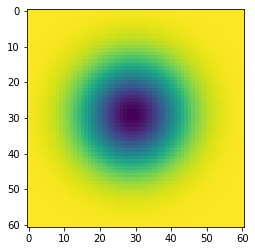

In [6]:
sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X*2/(sigma**2)+Y*2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))

plt.imshow(log)

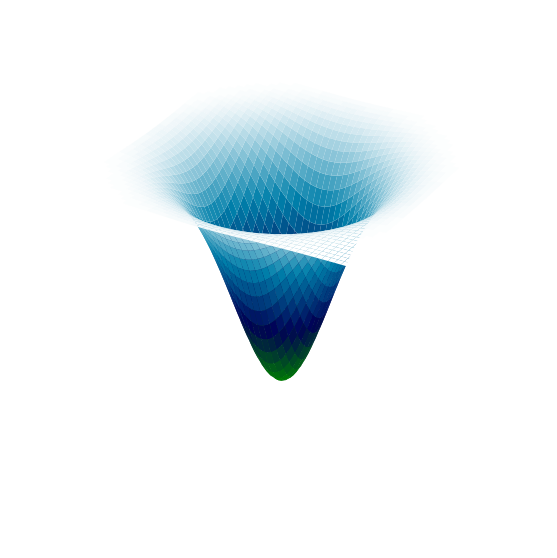

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X,Y, log, cmap = cm.ocean, linewidth = 0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.axis('off')
plt.show()



Part 2

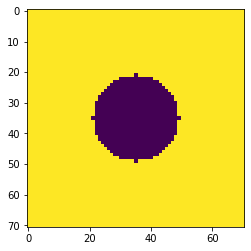

In [8]:
w,h = 71, 71
hw = w//2
hh = h//2

f = np.ones((h,w), dtype=np.float32)*255
X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))
r = w//5
f*= X**2 + Y**2 > r**2

plt.imshow(f)

(36, 36, 0)
5


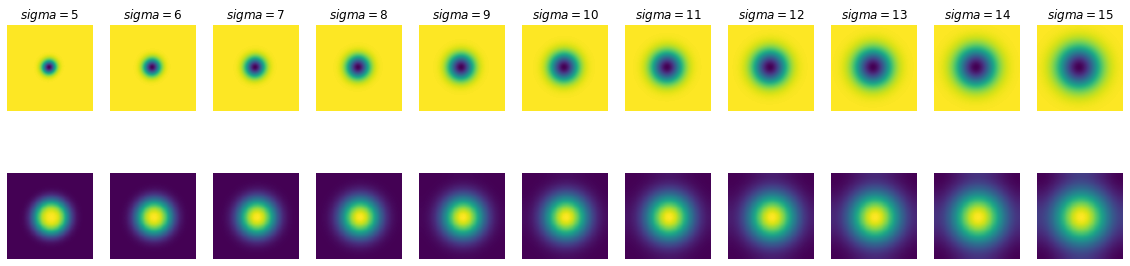

In [12]:
s = 11
fig, ax = plt.subplots(2,s,figsize = (20,5))
scale_space = np.empty((h,w,s), dtype=np.float32)
sigmas = np.arange(5,16,1)

for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas) 
    X, Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X*2/(sigma**2)+Y*2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:,:,i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].set_title(r'$sigma = {}$'.format(sigma))
    ax[0, i].axis('off')
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis = None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])

Part 3

Fitting Basics

Part 4

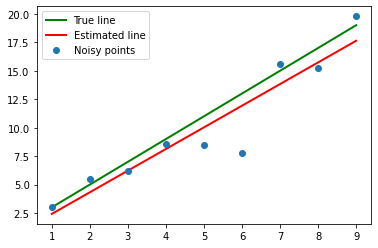

In [5]:
m = 2 # Line equa t ion : y = m*x + c . m i s the s l o p e . c i s the i n t e r c e p t .
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
noise = 2.*np.random.randn(len(x))
o = np.zeros(x.shape)
# o [=1] = 20
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0],x[-1]],[m*x[0] + c, m*x[-1] + c],color = 'g', linewidth = 2, label = r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar, mstar*x[-1] + cstar],color = 'r', linewidth = 2, label = r'Estimated line')
plt.plot(x,y, 'o', label = 'Noisy points')
plt.legend()

Part 5

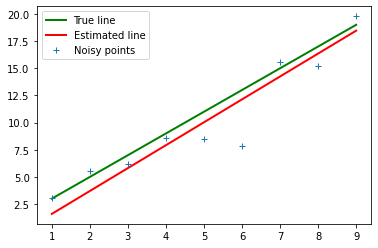

In [8]:
m = 2 
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
noise = 2.*np.random.randn(len(x))
o = np.zeros(x.shape)
# o [=1] = 20
y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11,u12],[u21,u22]])
W, V = np.linalg.eig(U)
ev_for_smallest = V[:, np.argmin(W)]

a = ev_for_smallest[0]
b = ev_for_smallest[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot([x[0],x[-1]],[m*x[0] + c, m*x[-1] + c],color = 'g', linewidth = 2, label = r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar, mstar*x[-1] + cstar],color = 'r', linewidth = 2, label = r'Estimated line')
plt.plot(x,y, '+', label = 'Noisy points')
plt.legend()